In [31]:
import os
import pandas as pd
import numpy as np
import datetime
import collections
import matplotlib.pyplot as plt

os.chdir('C:/Users/tjame/Documents/Curious Learning')

gPlay= pd.read_csv("GamePlay.csv")
gPmonth = pd.read_csv('english march.csv').drop_duplicates()

In [2]:
#This method finds the difference in seconds between two unix timestamps
def date_diff_in_seconds(time1, time2):
    d1 = datetime.datetime.fromtimestamp(time1/1000000)
    d2 = datetime.datetime.fromtimestamp(time2/1000000)
    
    delta = abs((d2 - d1).seconds)
  
    return delta

In [3]:
###single day of March 11

In [4]:
uniqueUsers = []
count=0 
while(count<len(gPlay)):
    currentUser = gPlay.iloc[count][0]
    if currentUser not in uniqueUsers:
        uniqueUsers.append(gPlay.iloc[count][0])
    count=count+1

#each user key will have 3 values: level, success/fail, time to succeed/fail level
usersData =dict()

for i in uniqueUsers:
    usersData[i]=dict()
    count = 0
    startLevel = False
    
    while(count<len(gPlay)):
        if(gPlay.iloc[count][0]==i):
            if(not startLevel):
                if(gPlay.iloc[count][2][:12]=='SegmentStart'):
                    time1=gPlay.iloc[count][3]
                    startLevel = True
                    endLevel = False
                    count=count+3
                else:
                    count=count+3
                
            else:   
                if(gPlay.iloc[count][2][0:12]=='LevelSuccess'):
                    time2=gPlay.iloc[count][3]
                    sf = (gPlay.iloc[count][2].split("_",1)[0]).split("Level",1)[1]
                    startLevel = False
                    endLevel = True
                if(gPlay.iloc[count][2][0:9]=='LevelFail'):
                    time2=gPlay.iloc[count][3] 
                    sf = (gPlay.iloc[count][2].split("_",1)[0]).split("Level",1)[1]
                    startLevel = False
                    endLevel = True
                    
                if(endLevel):   
                    time = date_diff_in_seconds(time1, time2)
                    level = 'Level ' + gPlay.iloc[count][2].split("_",1)[1]
                    usersData[i][level]=[]
                    usersData[i][level].append(time)
                    usersData[i][level].append(sf)
                
                count=count+3
        else:
            count=count+3
       
        
levels = dict()
for i in usersData:
    for j in usersData[i]:
        lvl = int(j.split(" ",1)[1])
        if(lvl not in levels):
            levels[lvl] =0
            for k in usersData[i][j]:
                if(type(k)==int):
                    if(k<3000):
                        levels[lvl] = levels[lvl] + k
        else:           
            lvl = int(j.split(" ",1)[1])
            for k in usersData[i][j]:
                if(type(k)==int):
                    if(k<3000):
                        levels[lvl] = levels[lvl] + k

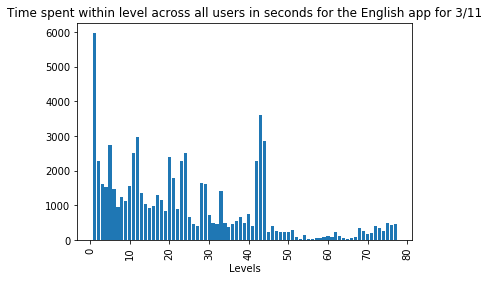

In [5]:
#sort dictionary by keys
od = collections.OrderedDict(sorted(levels.items()))

plt.bar(od.keys(), od.values())
plt.tick_params(axis='x', labelrotation=90)
plt.title("Time spent within level across all users in seconds for the English app for 3/11")
plt.xlabel("Levels")
plt.show()

users = dict()
for i in uniqueUsers:
    users[i] =0
    for j in usersData[i]: 
        users[i] = users[i] + usersData[i][j][0]

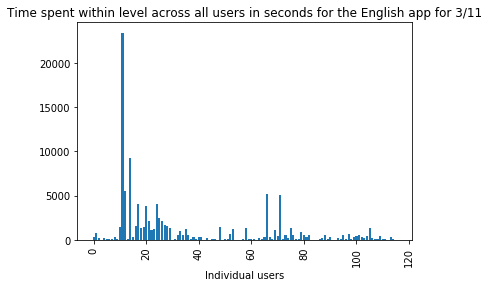

In [6]:
#change user keys so that the names are numbers
id = [i for i in range(len(users))]

plt.bar(id, users.values())
plt.tick_params(axis='x', labelrotation=90)
plt.title("Time spent within level across all users in seconds for the English app for 3/11")
plt.xlabel("Individual users")
plt.show()

In [7]:
###for whole month of March

In [8]:
uDmarch =dict()

count = 0
time = 0
time1 = 0
time2 =0
levelTime = 0
while(count<len(gPmonth)):
    
    #user
    i = gPmonth.iloc[count][0]
    
    if(i not in uDmarch):
        uDmarch[i]=dict()


    if(gPmonth.iloc[count][2][:12]=='SegmentStart'):
        if(count == 0):
            time1=gPmonth.iloc[count][3]
            count=count+2
        else:
            if(gPmonth.iloc[count-2][2][:13] == 'SelectMonster' or gPmonth.iloc[count-2][2][:5] == 'Level'):
                time1 = gPmonth.iloc[count][3]
                count=count+2
            else:
                if(gPmonth.iloc[count][2].split("_",1)[1] == gPmonth.iloc[count-2][2].split("_",1)[1] ):
                    time1=gPmonth.iloc[count][3]
                    count=count+2
                else:
                    levelTime = 0
                    time1=gPmonth.iloc[count][3]
                    count=count+2    
                    
        
    elif(gPmonth.iloc[count][2][:14]=='SegmentSuccess' or gPmonth.iloc[count][2][0:11]=='SegmentFail'):
        time2=gPmonth.iloc[count][3]
        time = date_diff_in_seconds(time1, time2)
        if(time<300):
            levelTime = levelTime + time
    
        count=count+2
    
    elif(gPmonth.iloc[count][2][:12]=='LevelSuccess' or gPmonth.iloc[count][2][:9]=='LevelFail'):
        sf = (gPmonth.iloc[count][2].split("_",1)[0]).split("Level",1)[1]
        
        level = 'Level ' + gPmonth.iloc[count][2].split("_",1)[1]
        
        if(level in uDmarch[i]):
            levelTime = 0
        else:
            date = datetime.datetime.fromtimestamp(time2/1000000).strftime('%m/%d/%Y-%A')
            uDmarch[i][level]=[]
            uDmarch[i][level].append(levelTime)
            uDmarch[i][level].append(sf)
            uDmarch[i][level].append(date)
            levelTime = 0
        
        count=count+2
    else:
        count=count+2

In [9]:
#Graph of all users time spent per level for March

#total
usersPerLevel = dict()
levelsMonth = dict()
for i in uDmarch:
    for j in uDmarch[i]:
        lvl = int(j.split(" ",1)[1])
        if(lvl not in levelsMonth):
            levelsMonth[lvl] =0
            usersPerLevel[lvl] = 0
            for k in uDmarch[i][j]:
                if(type(k)==int):
                    levelsMonth[lvl] = levelsMonth[lvl] + k
                    usersPerLevel[lvl] = usersPerLevel[lvl] +1
        else:           
            lvl = int(j.split(" ",1)[1])
            for k in uDmarch[i][j]:
                if(type(k)==int):
                    levelsMonth[lvl] = levelsMonth[lvl] + k
                    usersPerLevel[lvl] = usersPerLevel[lvl] +1

levelsMonth = collections.OrderedDict(sorted(levelsMonth.items()))
usersPerLevel = collections.OrderedDict(sorted(usersPerLevel.items()))

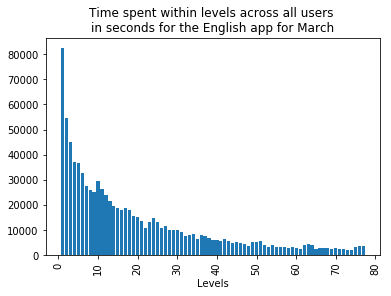

In [10]:
#average
avg = dict()
for i in levelsMonth:
    avg[i] = 0 
    avg[i] = (levelsMonth[i]/usersPerLevel[i])


plt.bar(levelsMonth.keys(), levelsMonth.values())
plt.tick_params(axis='x', labelrotation=90)
plt.title("Time spent within levels across all users \nin seconds for the English app for March")
plt.xlabel("Levels")
plt.show()

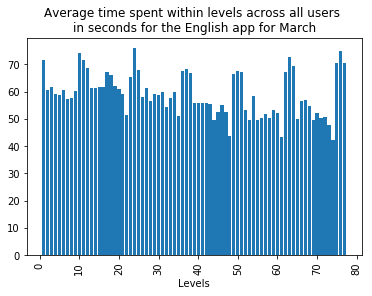

In [11]:
plt.bar(avg.keys(), avg.values())
plt.tick_params(axis='x', labelrotation=90)
plt.title("Average time spent within levels across all users \nin seconds for the English app for March")
plt.xlabel("Levels")
plt.show()

Text(0, 0.5, 'Seconds')

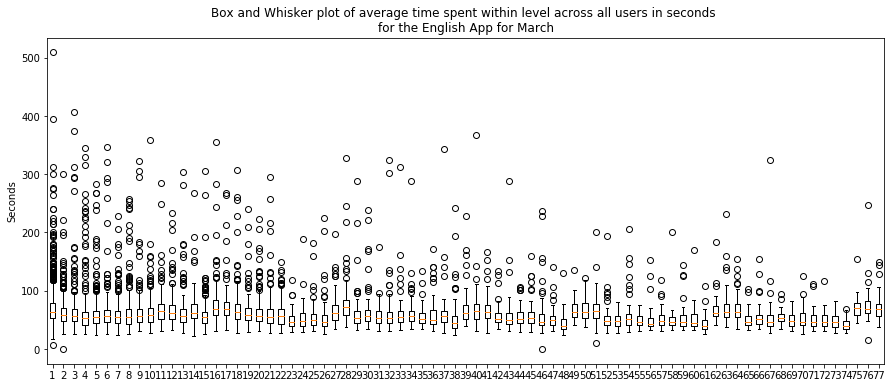

In [26]:
levelsMarch = dict()

for i in uDmarch:
    for j in uDmarch[i]:
        lvl = j
        time = uDmarch[i][j][0]
        
        if(lvl not in levelsMarch):
            levelsMarch[lvl] = []
            levelsMarch[lvl].append(time)
        else:
            levelsMarch[lvl].append(time)
            
boxLevels = []
for i in levelsMarch:
    boxLevels.append(list(levelsMarch[i]))


fig = plt.figure(1, figsize=(15, 6))

# Create an axes instance
ax = fig.add_subplot(111)

bp = ax.boxplot(boxLevels)
plt.title("Box and Whisker plot of average time spent within level across all users in seconds \nfor the English App for March")
plt.ylabel("Seconds")

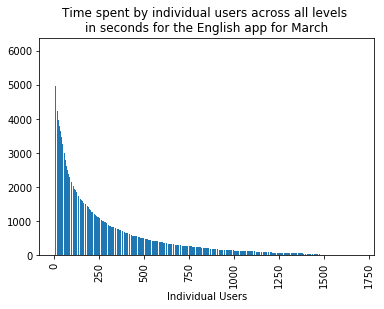

In [12]:
###Seconds within all levels for each user
usersTime = dict()
count = 1
for i in uDmarch:
    usersTime[count] = 0
    for j in uDmarch[i]:
        for k in uDmarch[i][j]:
            if(type(k)==int):
                    usersTime[count] = usersTime[count] + k
    count = count +1
    
sorted_usersTime = sorted(usersTime.items(), key=lambda kv: kv[1], reverse = True)
usersTime = collections.OrderedDict(sorted_usersTime)

usersCount = []
count = 0
while(count<len(uDmarch)):
    usersCount.append(count+1)
    count = count+1
    

plt.bar(usersCount, usersTime.values())
plt.tick_params(axis='x', labelrotation=90)
plt.title("Time spent by individual users across all levels \nin seconds for the English app for March")
plt.xlabel("Individual Users")
plt.show()

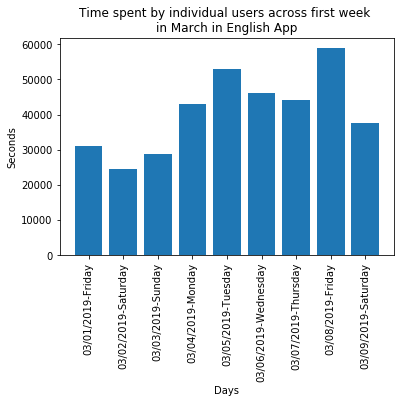

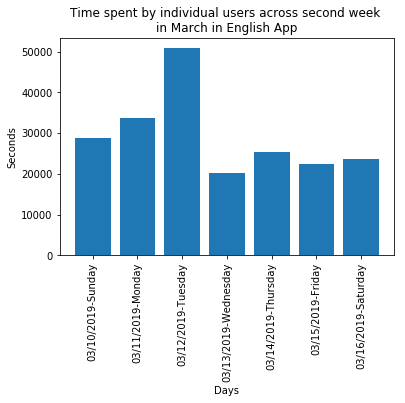

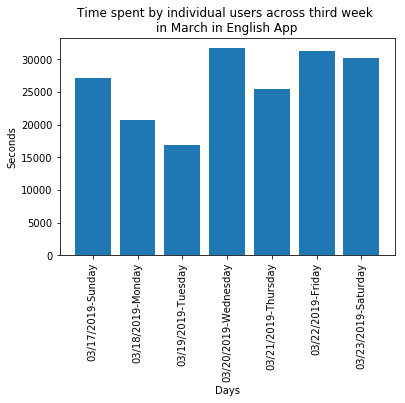

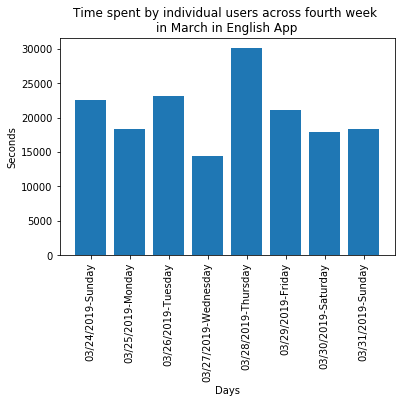

In [13]:
###weekly usage pattern 

week1 = dict()
week2 = dict()
week3 = dict()
week4 = dict()

week1range = ['03/01','03/02','03/03','03/04','03/05','03/06','03/07','03/08','03/09']
week2range = ['03/10','03/11','03/12','03/13','03/14','03/15','03/16']
week3range = ['03/17','03/18','03/19','03/20','03/21','03/22','03/23']
week4range = ['03/24','03/25','03/26','03/27','03/28','03/29','03/30','03/31']



for i in uDmarch:
    for j in uDmarch[i]:
        date = uDmarch[i][j][2]
        day = uDmarch[i][j][2][0:5]
        if(day in week1range):
            if(date not in week1):
                week1[date] = 0
                week1[date] = week1[date] + uDmarch[i][j][0]
            else:
                week1[date] = week1[date] + uDmarch[i][j][0]
        if(day in week2range):
            if(date not in week2):
                week2[date] = 0
                week2[date] = week2[date] + uDmarch[i][j][0]
            else:
                week2[date] = week2[date] + uDmarch[i][j][0]
        if(day in week3range):
            if(date not in week3):
                week3[date] = 0
                week3[date] = week3[date] + uDmarch[i][j][0]
            else:
                week3[date] = week3[date] + uDmarch[i][j][0]
        if(day in week4range):
            if(date not in week4):
                week4[date] = 0
                week4[date] = week4[date] + uDmarch[i][j][0]
            else:
                week4[date] = week4[date] + uDmarch[i][j][0]
                

week1 = collections.OrderedDict(sorted(week1.items()))
week2 = collections.OrderedDict(sorted(week2.items()))
week3 = collections.OrderedDict(sorted(week3.items()))
week4 = collections.OrderedDict(sorted(week4.items()))
                

plt.bar(week1.keys(), week1.values())
plt.tick_params(axis='x', labelrotation=90)
plt.title("Time spent by individual users across first week \nin March in English App")
plt.xlabel("Days")
plt.ylabel("Seconds")
plt.show()

plt.bar(week2.keys(), week2.values())
plt.tick_params(axis='x', labelrotation=90)
plt.title("Time spent by individual users across second week \nin March in English App")
plt.ylabel("Seconds")
plt.xlabel("Days")
plt.show()

plt.bar(week3.keys(), week3.values())
plt.tick_params(axis='x', labelrotation=90)
plt.title("Time spent by individual users across third week \nin March in English App")
plt.ylabel("Seconds")
plt.xlabel("Days")
plt.show()

plt.bar(week4.keys(), week4.values())
plt.tick_params(axis='x', labelrotation=90)
plt.title("Time spent by individual users across fourth week \nin March in English App")
plt.xlabel("Days")
plt.ylabel("Seconds")
plt.show()


[Text(0, 0, 'Monday'),
 Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Wednesday'),
 Text(0, 0, 'Thursday'),
 Text(0, 0, 'Friday'),
 Text(0, 0, 'Saturday'),
 Text(0, 0, 'Sunday')]

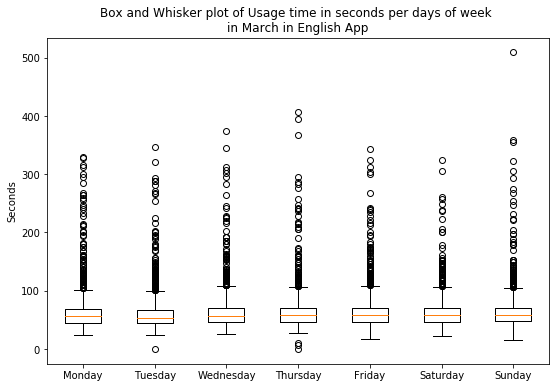

In [27]:
#box and whisker plots for each day of the week

mon = []
tues = []
wed = []
thurs = []
fri = []
sat = []
sun = []


for i in uDmarch:
    for j in uDmarch[i]:
        day = uDmarch[i][j][2].split("-",1)[1]
        
        if(day == 'Monday'):
            mon.append(uDmarch[i][j][0])
        if(day == 'Tuesday'):
            tues.append(uDmarch[i][j][0])
        if(day == 'Wednesday'):
            wed.append(uDmarch[i][j][0])
        if(day == 'Thursday'):
            thurs.append(uDmarch[i][j][0])
        if(day == 'Friday'):
            fri.append(uDmarch[i][j][0])
        if(day == 'Saturday'):
            sat.append(uDmarch[i][j][0])
        if(day == 'Sunday'):
            sun.append(uDmarch[i][j][0])    
        
        
days = [mon, tues, wed, thurs, fri, sat, sun]

fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(days)
plt.title("Box and Whisker plot of Usage time in seconds per days of week \nin March in English App")
plt.ylabel("Seconds")
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


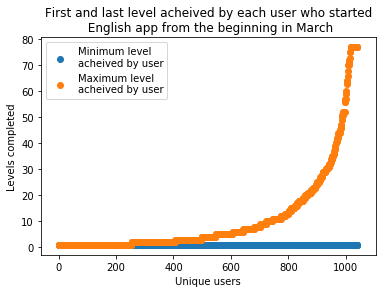

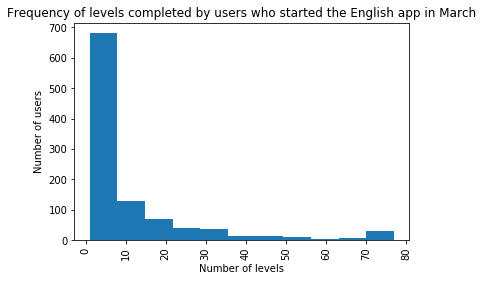

In [28]:
#graph of first and last level acheived by users

count = 1

firstLast = dict()

for i in uDmarch:
    firstLast[count] = []
    for j in uDmarch[i]:
        level = int(j.split(" ",1)[1])
        firstLast[count].append(level)
    
    for i in firstLast:
        firstLast[i].sort()
                
    count = count+1

#removes all levels completed that don't follow the user's linear path thru the levels
def sequentialList(mylist):
    mini = mylist[0]
    maxi = mylist[-1]
    l = list(range(mini, maxi+1))
    return(mylist==l)
    
count = 1
linear = dict()
for i in firstLast:
    cnt = 0
    if(len(firstLast[i])>0):
        if(firstLast[i][0] == 1 and sequentialList(firstLast[i])):
            linear[count] = []
            for j in firstLast[i]:
                linear[count].append(j)
            count=count+1

def sort_dict_by_value_len(d):
    sortedDict = dict()
    count=1
    for k in sorted(d, key=lambda k: len(d[k]), reverse=False):
        sortedDict[count] = d[k]
        count=count+1
    return sortedDict

linear=sort_dict_by_value_len(linear)



##gives mininum and maximum level acheived by users who completed levels in a linear path
                          
mini = dict()
maxi = dict()
for i in linear:
    if(linear[i]):
        mini[i]= 0
        maxi[i]= 0
        if(len(linear[i])>1):
            mini[i] = linear[i][0]
            maxi[i] = linear[i][-1]
        else:
            mini[i] = linear[i][0]
            maxi[i] = linear[i][0]


fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(mini.keys(), mini.values(), label = 'Minimum level \nacheived by user')
ax1.scatter(maxi.keys(), maxi.values(), label = 'Maximum level \nacheived by user')
plt.title("First and last level acheived by each user who started\n English app from the beginning in March")
plt.xlabel("Unique users")
plt.ylabel("Levels completed")
plt.legend(loc=2, prop={'size': 10})
plt.show()

##histogram of how many levels users who started the game in march completed
linearCount = []
for i in linear:
    linearCount.append(len(linear[i]))
    
plt.hist(linearCount, bins = 11)
plt.tick_params(axis='x', labelrotation=90)
plt.title("Frequency of levels completed by users who started the English app in March")
plt.xlabel("Number of levels")
plt.ylabel("Number of users")
plt.show()



In [16]:
####languages analysis 

In [17]:
brazil = pd.read_csv('brazil portuguese march.csv').drop_duplicates()
spanish = pd.read_csv('spanish march.csv').drop_duplicates()
afrikaans = pd.read_csv('afrikaans march.csv').drop_duplicates()
zulu = pd.read_csv('zulu march.csv').drop_duplicates()
english = pd.read_csv('english march.csv').drop_duplicates()

In [18]:
#brazil data 
brazilMarch =dict()

count = 0
time = 0
time1 = 0
time2 =0
levelTime = 0
while(count<len(brazil)):
    
    i = brazil.iloc[count][0]
    
    if(i not in brazilMarch):
        brazilMarch[i]=dict()

    if(brazil.iloc[count][2][:12]=='SegmentStart'):
        if(count == 0):
            time1=brazil.iloc[count][3]
            count=count+2
        else:
            if(brazil.iloc[count-2][2][:13] == 'SelectMonster' or brazil.iloc[count-2][2][:5] == 'Level'):
                time1 = brazil.iloc[count][3]
                count=count+2
            else:
                if(brazil.iloc[count][2].split("_",1)[1] == brazil.iloc[count-2][2].split("_",1)[1] ):
                    time1=brazil.iloc[count][3]
                    count=count+2
                else:
                    levelTime = 0
                    time1=brazil.iloc[count][3]
                    count=count+2           
                    
        
    elif(brazil.iloc[count][2][:14]=='SegmentSuccess' or brazil.iloc[count][2][0:11]=='SegmentFail'):
        time2=brazil.iloc[count][3]
        time = date_diff_in_seconds(time1, time2)
        if(time<300):
            levelTime = levelTime + time    
        count=count+2
    
    elif(brazil.iloc[count][2][:12]=='LevelSuccess' or brazil.iloc[count][2][:9]=='LevelFail'):
        sf = (brazil.iloc[count][2].split("_",1)[0]).split("Level",1)[1]
        
        level = 'Level ' + brazil.iloc[count][2].split("_",1)[1]
        country = brazil.iloc[count][4]         
        
        if(level in brazilMarch[i]):
            levelTime = 0
        else:
            brazilMarch[i][level] = [] 
            brazilMarch[i][level].append(levelTime)
            brazilMarch[i][level].append(country)
    
            levelTime = 0
        
        count=count+2
       
    else:
        count = count+2
        
        
totalTimeBrazil = 0 

for i in brazilMarch:
    for j in brazilMarch[i]:
        totalTimeBrazil = totalTimeBrazil + brazilMarch[i][j][0]
        
hoursBrazil = totalTimeBrazil/(60*60)

In [19]:
###spanish data
spanishMarch =dict()

count = 0
time = 0
time1 = 0
time2 =0
levelTime = 0
while(count<len(spanish)):
    
    i = spanish.iloc[count][0]
    
    if(i not in spanishMarch):
        spanishMarch[i]=dict()

    if(spanish.iloc[count][2][:12]=='SegmentStart'):
        if(count == 0):
            time1=spanish.iloc[count][3]
            count=count+2
        else:
            if(spanish.iloc[count-2][2][:13] == 'SelectMonster' or spanish.iloc[count-2][2][:5] == 'Level'):
                time1 = spanish.iloc[count][3]
                count=count+2
            else:
                if(spanish.iloc[count][2].split("_",1)[1] == spanish.iloc[count-2][2].split("_",1)[1] ):
                    time1=spanish.iloc[count][3]
                    count=count+2
                else:
                    levelTime = 0
                    time1=spanish.iloc[count][3]
                    count=count+2           
                    
        
    elif(spanish.iloc[count][2][:14]=='SegmentSuccess' or spanish.iloc[count][2][0:11]=='SegmentFail'):
        time2=spanish.iloc[count][3]
        time = date_diff_in_seconds(time1, time2)
        if(time<300):
            levelTime = levelTime + time    
        count=count+2
    
    elif(spanish.iloc[count][2][:12]=='LevelSuccess' or spanish.iloc[count][2][:9]=='LevelFail'):
        level = 'Level ' + spanish.iloc[count][2].split("_",1)[1]
        country = spanish.iloc[count][4]         
        
        if(level in spanishMarch[i]):
            levelTime = 0
        else:
            spanishMarch[i][level] = [] 
            spanishMarch[i][level].append(levelTime)
            spanishMarch[i][level].append(country)
            levelTime = 0
        
        count=count+2
        
    else:
        count = count+2
        
        
totalTimeSpanish = 0 

for i in spanishMarch:
    for j in spanishMarch[i]:
        totalTimeSpanish = totalTimeSpanish + spanishMarch[i][j][0]
        
hoursSpanish = totalTimeSpanish/(60*60)

In [20]:
###afrikaans data
afrikaansMarch =dict()

count = 0
time = 0
time1 = 0
time2 =0
levelTime = 0
while(count<len(afrikaans)):
    
    i = afrikaans.iloc[count][0]
    
    if(i not in afrikaansMarch):
        afrikaansMarch[i]=dict()

    if(afrikaans.iloc[count][2][:12]=='SegmentStart'):
        if(count == 0):
            time1=afrikaans.iloc[count][3]
            count=count+2
        else:
            if(afrikaans.iloc[count-2][2][:13] == 'SelectMonster' or afrikaans.iloc[count-2][2][:5] == 'Level'):
                time1 = afrikaans.iloc[count][3]
                count=count+2
            else:
                if(afrikaans.iloc[count][2].split("_",1)[1] == afrikaans.iloc[count-2][2].split("_",1)[1] ):
                    time1=afrikaans.iloc[count][3]
                    count=count+2
                else:
                    levelTime = 0
                    time1=afrikaans.iloc[count][3]
                    count=count+2           
                    
        
    elif(afrikaans.iloc[count][2][:14]=='SegmentSuccess' or afrikaans.iloc[count][2][0:11]=='SegmentFail'):
        time2=afrikaans.iloc[count][3]
        time = date_diff_in_seconds(time1, time2)
        if(time<300):
            levelTime = levelTime + time    
        count=count+2
    
    elif(afrikaans.iloc[count][2][:12]=='LevelSuccess' or afrikaans.iloc[count][2][:9]=='LevelFail'):
        level = 'Level ' + afrikaans.iloc[count][2].split("_",1)[1]
        country = afrikaans.iloc[count][4]         
        
        if(level in afrikaansMarch[i]):
            levelTime = 0
        else:
            afrikaansMarch[i][level] = [] 
            afrikaansMarch[i][level].append(levelTime)
            afrikaansMarch[i][level].append(country)
            levelTime = 0
        
        count=count+2
    else:
        count = count+2
        
        
totalTimeAfrikaans = 0 

for i in afrikaansMarch:
    for j in afrikaansMarch[i]:
        totalTimeAfrikaans = totalTimeAfrikaans + afrikaansMarch[i][j][0]
        
hoursAfrikaans = totalTimeAfrikaans/(60*60)

In [21]:
###zulu data 

zuluMarch =dict()

count = 0
time = 0
time1 = 0
time2 =0
levelTime = 0
while(count<len(zulu)):
    
    i = zulu.iloc[count][0]
    
    if(i not in zuluMarch):
        zuluMarch[i]=dict()

    if(zulu.iloc[count][2][:12]=='SegmentStart'):
        if(count == 0):
            time1=zulu.iloc[count][3]
            count=count+2
        else:
            if(zulu.iloc[count-2][2][:13] == 'SelectMonster' or zulu.iloc[count-2][2][:5] == 'Level'):
                time1 = zulu.iloc[count][3]
                count=count+2
            else:
                if(zulu.iloc[count][2].split("_",1)[1] == zulu.iloc[count-2][2].split("_",1)[1] ):
                    time1=zulu.iloc[count][3]
                    count=count+2
                else:
                    levelTime = 0
                    time1=zulu.iloc[count][3]
                    count=count+2           
                    
        
    elif(zulu.iloc[count][2][:14]=='SegmentSuccess' or zulu.iloc[count][2][0:11]=='SegmentFail'):
        time2 = zulu.iloc[count][3]
        time = date_diff_in_seconds(time1, time2)
        if(time<300):
            levelTime = levelTime + time
    
        count=count+2
    
    elif(zulu.iloc[count][2][:12]=='LevelSuccess' or zulu.iloc[count][2][:9]=='LevelFail'):        
        level = 'Level ' + zulu.iloc[count][2].split("_",1)[1]
        country = zulu.iloc[count][4]         
        if(level in zuluMarch[i]):
            levelTime = 0
        else:
            zuluMarch[i][level] = []
            zuluMarch[i][level].append(levelTime)
            zuluMarch[i][level].append(country)
            levelTime = 0
        
        count=count+2
        
        
    else:
        count = count+2
        
        
totalTimeZulu = 0 

for i in zuluMarch:
    for j in zuluMarch[i]:
        totalTimeZulu = totalTimeZulu + zuluMarch[i][j][0]
        
hoursZulu = totalTimeZulu/(60*60)


In [37]:
###english data 

englishMarch =dict()
english = english.drop_duplicates()

count = 0
time = 0
time1 = 0
time2 =0
levelTime = 0
while(count<len(english)):
    
    i = english.iloc[count][0]
    
    if(i not in englishMarch):
        englishMarch[i]=dict()

    if(english.iloc[count][2][:12]=='SegmentStart'):
        if(count == 0):
            time1=english.iloc[count][3]
            count=count+2
        else:
            if(english.iloc[count-2][2][:13] == 'SelectMonster' or english.iloc[count-2][2][:5] == 'Level'):
                time1 = english.iloc[count][3]
                count=count+2
            else:
                if(english.iloc[count][2].split("_",1)[1] == english.iloc[count-2][2].split("_",1)[1] ):
                    time1=english.iloc[count][3]
                    count=count+2
                else:
                    levelTime = 0
                    time1=english.iloc[count][3]
                    count=count+2           
                    
        
    elif(english.iloc[count][2][:14]=='SegmentSuccess' or english.iloc[count][2][0:11]=='SegmentFail'):
        time2 = english.iloc[count][3]
        time = date_diff_in_seconds(time1, time2)
        if(time<300):
            levelTime = levelTime + time    
        count=count+2
    
    elif(english.iloc[count][2][:12]=='LevelSuccess' or english.iloc[count][2][:9]=='LevelFail'):        
        level = 'Level ' + english.iloc[count][2].split("_",1)[1]
        country = english.iloc[count][4]         
        if(level in englishMarch[i]):
            levelTime = 0
        else:
            englishMarch[i][level] = []
            englishMarch[i][level].append(levelTime)
            englishMarch[i][level].append(country)
            levelTime = 0
        
        count=count+2
        
        
    else:
        count = count+2
        


KeyboardInterrupt: 

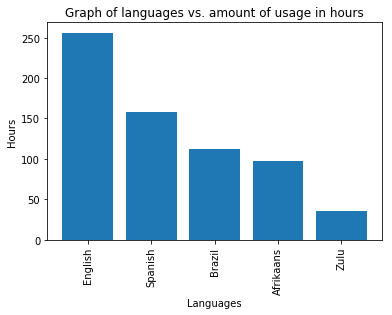

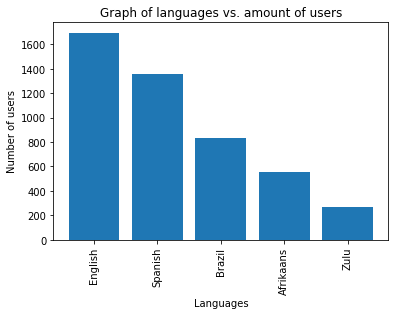

In [39]:
totalTimeEnglish = 0 

for i in uDmarch:
    for j in uDmarch[i]:
        totalTimeEnglish = totalTimeEnglish + uDmarch[i][j][0]
        
hoursEnglish = totalTimeEnglish/(60*60)

languages = ['English', 'Spanish', 'Brazil', 'Afrikaans',  'Zulu']
languagesHours = [hoursEnglish, hoursSpanish, hoursBrazil, hoursAfrikaans, hoursZulu]

plt.bar(languages, languagesHours)
plt.tick_params(axis='x', labelrotation=90)
plt.title("Graph of languages vs. amount of usage in hours")
plt.xlabel("Languages")
plt.ylabel("Hours")
plt.show()

languagesUsers = [len(uDmarch), len(spanishMarch), len(brazilMarch), len(afrikaansMarch), len(zuluMarch)]
plt.bar(languages, languagesUsers)
plt.tick_params(axis='x', labelrotation=90)
plt.title("Graph of languages vs. amount of users")
plt.xlabel("Languages")
plt.ylabel("Number of users")
plt.show()

In [23]:
###usage by country

zuluCountries = dict()

for i in zuluMarch:
    if(zuluMarch[i]):
        country = list(zuluMarch[i].values())[0][1]
        
        if(country not in zuluCountries):
            zuluCountries[country] = 0
            zuluCountries[country] = zuluCountries[country] + 1
        else:
            zuluCountries[country] = zuluCountries[country] + 1
            

afrikaansCountries = dict()

for i in afrikaansMarch:
    if(afrikaansMarch[i]):
        country = list(afrikaansMarch[i].values())[0][1]
        
        if(country not in afrikaansCountries):
            afrikaansCountries[country] = 0
            afrikaansCountries[country] = afrikaansCountries[country] + 1
        else:
            afrikaansCountries[country] = afrikaansCountries[country] + 1
            

spanishCountries = dict()

for i in spanishMarch:
    if(spanishMarch[i]):
        country = list(spanishMarch[i].values())[0][1]
        
        if(country not in spanishCountries):
            spanishCountries[country] = 0
            spanishCountries[country] = spanishCountries[country] + 1
        else:
            spanishCountries[country] = spanishCountries[country] + 1
            
            
brazilCountries = dict()

for i in brazilMarch:
    if(brazilMarch[i]):
        country = list(brazilMarch[i].values())[0][1]
        
        if(country not in brazilCountries):
            brazilCountries[country] = 0
            brazilCountries[country] = brazilCountries[country] + 1
        else:
            brazilCountries[country] = brazilCountries[country] + 1
            

englishCountries = dict()

for i in englishMarch:
    if(englishMarch[i]):
        country = list(englishMarch[i].values())[0][1]
        
        if(country not in englishCountries):
            englishCountries[country] = 0
            englishCountries[country] = englishCountries[country] + 1
        else:
            englishCountries[country] = englishCountries[country] + 1




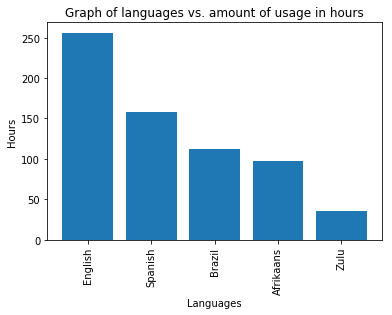

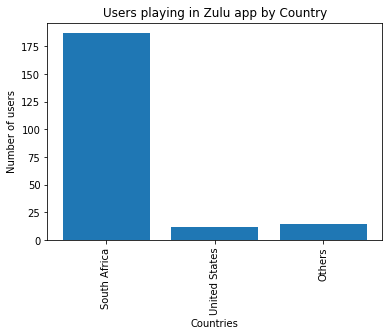

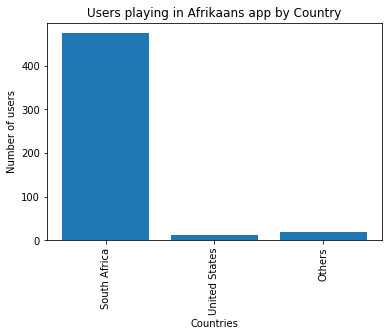

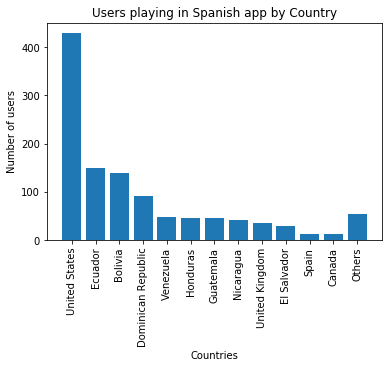

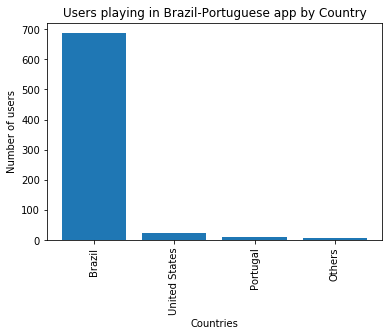

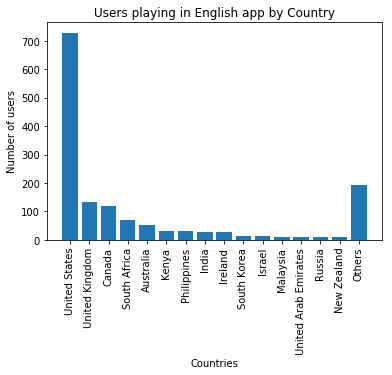

In [33]:
###usage by country

zuluCountries = dict()

for i in zuluMarch:
    if(zuluMarch[i]):
        country = list(zuluMarch[i].values())[0][1]
        
        if(country not in zuluCountries):
            zuluCountries[country] = 0
            zuluCountries[country] = zuluCountries[country] + 1
        else:
            zuluCountries[country] = zuluCountries[country] + 1
            
 
delete = []
zuluOthers = 0
for i in zuluCountries:
    if(zuluCountries[i]<10):
        zuluOthers = zuluOthers + zuluCountries[i]
        delete.append(i)

for key in delete: del zuluCountries[key] 
     
        
sortedZulu = sorted(zuluCountries.items(), key=lambda kv: kv[1], reverse = True)
sortedZulu = collections.OrderedDict(sortedZulu)
sortedZulu['Others'] = zuluOthers        




afrikaansCountries = dict()

for i in afrikaansMarch:
    if(afrikaansMarch[i]):
        country = list(afrikaansMarch[i].values())[0][1]
        
        if(country not in afrikaansCountries):
            afrikaansCountries[country] = 0
            afrikaansCountries[country] = afrikaansCountries[country] + 1
        else:
            afrikaansCountries[country] = afrikaansCountries[country] + 1
            
delete = []
afriOthers = 0
for i in afrikaansCountries:
    if(afrikaansCountries[i]<10):
        afriOthers = afriOthers + afrikaansCountries[i]
        delete.append(i)

for key in delete: del afrikaansCountries[key] 
     
        
sortedAfri = sorted(afrikaansCountries.items(), key=lambda kv: kv[1], reverse = True)
sortedAfri = collections.OrderedDict(sortedAfri)
sortedAfri['Others'] = afriOthers       
            



spanishCountries = dict()

for i in spanishMarch:
    if(spanishMarch[i]):
        country = list(spanishMarch[i].values())[0][1]
        
        if(country not in spanishCountries):
            spanishCountries[country] = 0
            spanishCountries[country] = spanishCountries[country] + 1
        else:
            spanishCountries[country] = spanishCountries[country] + 1
            
delete = []
spanishOthers = 0
for i in spanishCountries:
    if(spanishCountries[i]<10):
        spanishOthers = spanishOthers + spanishCountries[i]
        delete.append(i)

for key in delete: del spanishCountries[key] 
     
        
sortedSpanish = sorted(spanishCountries.items(), key=lambda kv: kv[1], reverse = True)
sortedSpanish = collections.OrderedDict(sortedSpanish)
sortedSpanish['Others'] = spanishOthers       
            
            
            
            
brazilCountries = dict()

for i in brazilMarch:
    if(brazilMarch[i]):
        country = list(brazilMarch[i].values())[0][1]
        
        if(country not in brazilCountries):
            brazilCountries[country] = 0
            brazilCountries[country] = brazilCountries[country] + 1
        else:
            brazilCountries[country] = brazilCountries[country] + 1
            
delete = []
brazilOthers = 0
for i in brazilCountries:
    if(brazilCountries[i]<10):
        brazilOthers = brazilOthers + brazilCountries[i]
        delete.append(i)

for key in delete: del brazilCountries[key] 
     
        
sortedBrazil = sorted(brazilCountries.items(), key=lambda kv: kv[1], reverse = True)
sortedBrazil = collections.OrderedDict(sortedBrazil)
sortedBrazil['Others'] = brazilOthers                
            
            
            

englishCountries = dict()

for i in englishMarch:
    if(englishMarch[i]):
        country = list(englishMarch[i].values())[0][1]
        
        if(country not in englishCountries):
            englishCountries[country] = 0
            englishCountries[country] = englishCountries[country] + 1
        else:
            englishCountries[country] = englishCountries[country] + 1

delete = []
englishOthers = 0
for i in englishCountries:
    if(englishCountries[i]<10):
        englishOthers = englishOthers + englishCountries[i]
        delete.append(i)

for key in delete: del englishCountries[key] 
     
        
sortedEnglish = sorted(englishCountries.items(), key=lambda kv: kv[1], reverse = True)
sortedEnglish = collections.OrderedDict(sortedEnglish)
sortedEnglish['Others'] = englishOthers             
            
            

#languages per usage
languages = ['English', 'Spanish', 'Brazil', 'Afrikaans',  'Zulu']
languagesHours = [hoursEnglish, hoursSpanish, hoursBrazil, hoursAfrikaans, hoursZulu]

plt.bar(languages, languagesHours)
plt.tick_params(axis='x', labelrotation=90)
plt.title("Graph of languages vs. amount of usage in hours")
plt.xlabel("Languages")
plt.ylabel("Hours")
plt.show()

#graphs of usage by country

plt.bar(sortedZulu.keys(), sortedZulu.values())
plt.tick_params(axis='x', labelrotation=90)
plt.title("Users playing in Zulu app by Country")
plt.xlabel("Countries")
plt.ylabel("Number of users")
plt.show()

plt.bar(sortedAfri.keys(), sortedAfri.values())
plt.tick_params(axis='x', labelrotation=90)
plt.title("Users playing in Afrikaans app by Country")
plt.xlabel("Countries")
plt.ylabel("Number of users")
plt.show()


plt.bar(sortedSpanish.keys(), sortedSpanish.values())
plt.tick_params(axis='x', labelrotation=90)
plt.title("Users playing in Spanish app by Country")
plt.xlabel("Countries")
plt.ylabel("Number of users")
plt.show()

plt.bar(sortedBrazil.keys(), sortedBrazil.values())
plt.tick_params(axis='x', labelrotation=90)
plt.title("Users playing in Brazil-Portuguese app by Country")
plt.xlabel("Countries")
plt.ylabel("Number of users")
plt.show()


plt.bar(sortedEnglish.keys(), sortedEnglish.values())
plt.tick_params(axis='x', labelrotation=90)
plt.title("Users playing in English app by Country")
plt.xlabel("Countries")
plt.ylabel("Number of users")
plt.show()

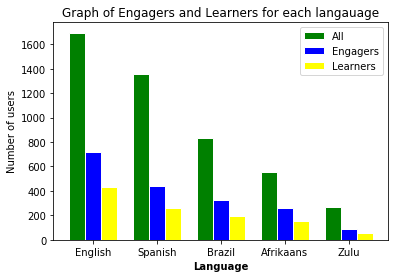

In [34]:
#####engagers and learners analysis


def engagersDict(langDict):
    engag = dict()
    
    for i in langDict:
        if(len(langDict[i])>=5):
            engag[i] = len(langDict[i])
                
    return engag


def learnersDict(langDict):
    learn = dict()
    
    for i in langDict:
        if(len(langDict[i])>=10):
            learn[i] = len(langDict[i])
                
    return learn
    
englishEngagers = engagersDict(englishMarch)
englishLearners = learnersDict(englishMarch)

spanishEngagers = engagersDict(spanishMarch)
spanishLearners = learnersDict(spanishMarch)

brazilEngagers = engagersDict(brazilMarch)
brazilLearners = learnersDict(brazilMarch)

afrikaansEngagers = engagersDict(afrikaansMarch)
afrikaansLearners = learnersDict(afrikaansMarch)

zuluEngagers = engagersDict(zuluMarch)
zuluLearners = learnersDict(zuluMarch)




languagesUsers = [len(englishMarch), len(spanishMarch), len(brazilMarch), len(afrikaansMarch), len(zuluMarch)]
languagesEngagers = [len(englishEngagers), len(spanishEngagers), len(brazilEngagers), len(afrikaansEngagers), len(zuluEngagers)]
languagesLearners = [len(englishLearners), len(spanishLearners), len(brazilLearners), len(afrikaansLearners), len(zuluLearners)]


barWidth = 0.25
r1 = np.arange(len(languagesUsers))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, languagesUsers, color='green', width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, languagesEngagers, color='blue', width=barWidth, edgecolor='white', label='var1')
plt.bar(r3, languagesLearners, color='yellow', width=barWidth, edgecolor='white', label='var1')

plt.xlabel('Language', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(languagesUsers))], languages)
plt.ylabel("Number of users")
plt.legend(('All', 'Engagers', 'Learners'))
plt.title('Graph of Engagers and Learners for each langauage')
plt.show()
